<a href="https://colab.research.google.com/github/Abkhenaten/Projects/blob/master/ML_Stock_Prediction_in_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Import Libraries
!pip install quandl
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

#Get data from quandl
quandl.ApiConfig.api_key = 'BFmN9ZJF-ewMfJcBJ3B4'


In [30]:
#Get stock information for Amazon
df = quandl.get('WIKI/AMZN')
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


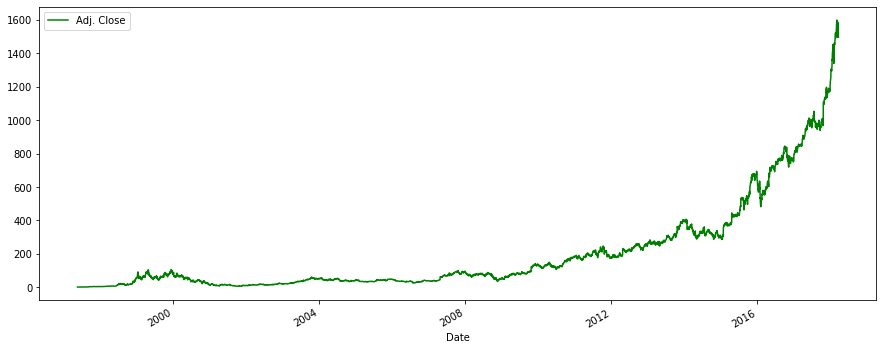

In [31]:
#Plot the information
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show() 

In [32]:
#Process the data
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
df 

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000
...,...,...
2018-03-21,1581.860000,NaN
2018-03-22,1544.100000,NaN
2018-03-23,1495.560000,NaN


In [33]:
#Create test and train data set
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

Y = np.array(df['Prediction'])
Y = Y[:-forecast]


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

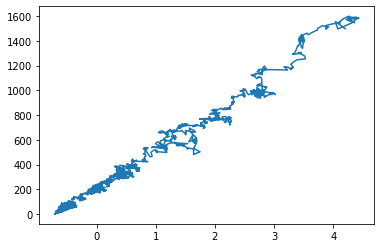

In [35]:
plt.plot(X, Y)

In [36]:
#Chack confidence
confidence = clf.score(X_test, Y_test)
confidence

0.9879809015874149

In [37]:
#Predict predictive values from forecast of last 30 days of dataset
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1497.026506   1535.78244837 1547.14194872 1533.27932785 1554.1315946
 1569.58518191 1571.5367674  1587.70098639 1610.98212857 1600.40750499
 1600.90600781 1580.75376629 1587.96614746 1612.74279809 1627.62363748
 1635.42997946 1642.70599929 1671.37521446 1692.05777813 1681.22859992
 1684.21961682 1675.01322438 1663.72796913 1635.35573436 1679.45732396
 1674.52532801 1634.4753996  1582.99172574 1646.94857645 1584.57208573]


(736445.0, 737192.5)

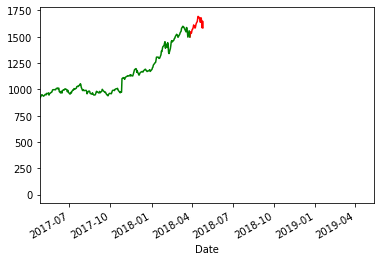

In [38]:
#Plot the data
dates = pd.date_range(start='2018-03-28', end='2018-04-26')
plt.plot(dates, forecast_predicted, color='r')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))